# Preparation and Data

In [125]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import pandas as pd


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


housing = pd.read_csv("Datasets/housing.csv")
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


housing_with_index = housing.reset_index()
housing_with_index

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


# Description of Data

In [126]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [127]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [128]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Histogram plots of numerical attributes

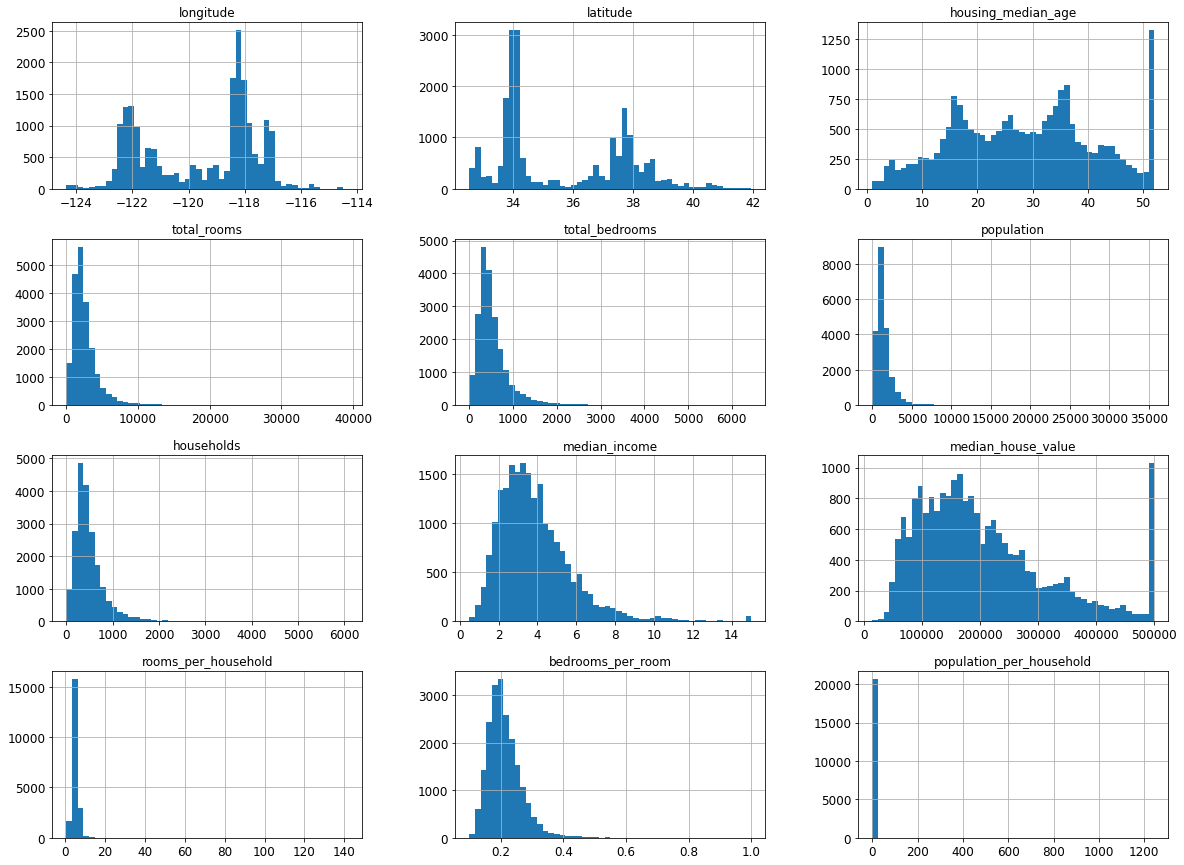

In [129]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Note: Median_Income is in 10000s Also may need to transform the tail heavy features

## Creating a training and test sets

In [130]:
import Utils as utils
train_set,test_set = utils.train_test_maker(housing_with_index,0.2)

In [131]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


### Note: sklearn.model_selection.train_test_split can also be used

In [132]:
a = utils.stratum_maker(housing_with_index,"median_income","income_cat",bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

In [133]:
a

0        (6.0, inf]
1        (6.0, inf]
2        (6.0, inf]
3        (4.5, 6.0]
4        (3.0, 4.5]
            ...    
20635    (1.5, 3.0]
20636    (1.5, 3.0]
20637    (1.5, 3.0]
20638    (1.5, 3.0]
20639    (1.5, 3.0]
Name: income_cat, Length: 20640, dtype: category
Categories (5, interval[float64, right]): [(0.0, 1.5] < (1.5, 3.0] < (3.0, 4.5] < (4.5, 6.0] < (6.0, inf]]

<AxesSubplot:>

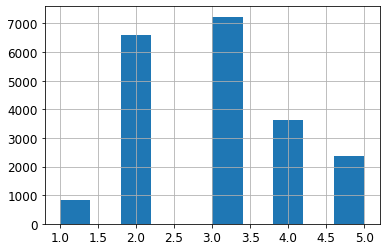

In [134]:
pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5]).hist()

### train and test set should be representative of the median_income feature since it is decided to be an important feature

In [135]:
test_set_strat , train_set_strat = utils.stratified_shuffled_sampling(housing_with_index,"median_income","income_cat",
                                                                     [0., 1.5, 3.0, 4.5, 6., np.inf],[1, 2, 3, 4, 5],1,0.2)
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass test_size=0.2, train_size=42 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [136]:
test_set_strat

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
12007,12007,-117.60,33.91,15.0,1864.0,271.0,1006.0,288.0,7.2379,251000.0,INLAND,6.472222,0.145386,3.493056,"(6.0, inf]"
15728,15728,-122.45,37.78,52.0,2033.0,438.0,2198.0,418.0,3.6667,418400.0,NEAR BAY,4.863636,0.215445,5.258373,"(3.0, 4.5]"
15130,15130,-116.91,32.86,15.0,3153.0,628.0,1633.0,527.0,3.6898,131000.0,<1H OCEAN,5.982922,0.199175,3.098672,"(3.0, 4.5]"
8526,8526,-118.33,33.89,42.0,1816.0,338.0,897.0,306.0,5.1874,230800.0,<1H OCEAN,5.934641,0.186123,2.931373,"(4.5, 6.0]"
6609,6609,-118.15,34.19,38.0,1750.0,411.0,1398.0,409.0,2.3967,163100.0,<1H OCEAN,4.278729,0.234857,3.418093,"(1.5, 3.0]"
1982,1982,-120.81,38.67,14.0,8396.0,1578.0,3952.0,1474.0,3.0565,118800.0,INLAND,5.696065,0.187947,2.681140,"(3.0, 4.5]"
6023,6023,-117.75,34.05,35.0,1293.0,339.0,1494.0,312.0,1.6645,93300.0,INLAND,4.144231,0.262181,4.788462,"(1.5, 3.0]"
12478,12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,70500.0,INLAND,3.706250,0.287521,3.243750,"(1.5, 3.0]"
8240,8240,-118.19,33.77,21.0,2103.0,727.0,1064.0,603.0,1.6178,137500.0,NEAR OCEAN,3.487562,0.345697,1.764511,"(1.5, 3.0]"
12301,12301,-116.87,33.91,37.0,1858.0,361.0,1632.0,310.0,2.7536,73100.0,INLAND,5.993548,0.194295,5.264516,"(1.5, 3.0]"


In [137]:
test_set_strat["income_cat"].value_counts()/len(test_set_strat)

(3.0, 4.5]    0.357143
(1.5, 3.0]    0.309524
(4.5, 6.0]    0.166667
(6.0, inf]    0.119048
(0.0, 1.5]    0.047619
Name: income_cat, dtype: float64

In [ ]:
for set_ in (train_set_strat,test_set_strat):
    set_.drop("income_cat",axis=1,inplace=True)

In [ ]:
test_set_strat

### Always a good practice to work on a copy of training set

In [ ]:
housing_train = train_set_strat.copy()

In [ ]:
housing_train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.3,
                  s = housing_train["population"]/100,label="Population",figsize=(10,7),
                  c = "median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

### from the above it seems that housing prices are related to population and location

#### Correlation between features

In [ ]:
corr_matrix = housing_train.corr()

In [143]:
corr_matrix

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
index,1.000000,-0.119828,0.092146,-0.178004,0.066777,0.031738,0.024371,0.031226,0.085768,0.074876,0.044395,-0.134354,-0.001081
longitude,-0.119828,1.000000,-0.924456,-0.101926,0.024750,0.052731,0.078433,0.038350,-0.012490,-0.042207,-0.023029,0.095550,0.026398
latitude,0.092146,-0.924456,1.000000,0.009032,-0.022787,-0.058588,-0.088884,-0.057785,-0.079688,-0.148008,0.081903,-0.123321,-0.014731
housing_median_age,-0.178004,-0.101926,0.009032,1.000000,-0.352585,-0.315182,-0.295489,-0.300715,-0.111105,0.119124,-0.119440,0.138564,0.011796
total_rooms,0.066777,0.024750,-0.022787,-0.352585,1.000000,0.936717,0.858562,0.924467,0.186394,0.117204,0.117758,-0.180081,-0.042403
total_bedrooms,0.031738,0.052731,-0.058588,-0.315182,0.936717,1.000000,0.882371,0.982852,-0.012887,0.041635,-0.001823,0.082346,-0.051458
population,0.024371,0.078433,-0.088884,-0.295489,0.858562,0.882371,1.000000,0.908445,-0.000441,-0.038550,-0.052037,0.033555,0.135731
households,0.031226,0.038350,-0.057785,-0.300715,0.924467,0.982852,0.908445,1.000000,0.006904,0.056444,-0.061657,0.065609,-0.049193
median_income,0.085768,-0.012490,-0.079688,-0.111105,0.186394,-0.012887,-0.000441,0.006904,1.000000,0.681825,0.316949,-0.609933,0.007476
median_house_value,0.074876,-0.042207,-0.148008,0.119124,0.117204,0.041635,-0.038550,0.056444,0.681825,1.000000,0.126146,-0.239212,-0.054903


In [144]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.681825
rooms_per_household         0.126146
housing_median_age          0.119124
total_rooms                 0.117204
index                       0.074876
households                  0.056444
total_bedrooms              0.041635
population                 -0.038550
longitude                  -0.042207
population_per_household   -0.054903
latitude                   -0.148008
bedrooms_per_room          -0.239212
Name: median_house_value, dtype: float64

#### based on correlation median_income,rooms_per_household, total_rooms, population_per_household and bedrooms_per_room have highest correlation with median_house_value

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='median_income', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_inco

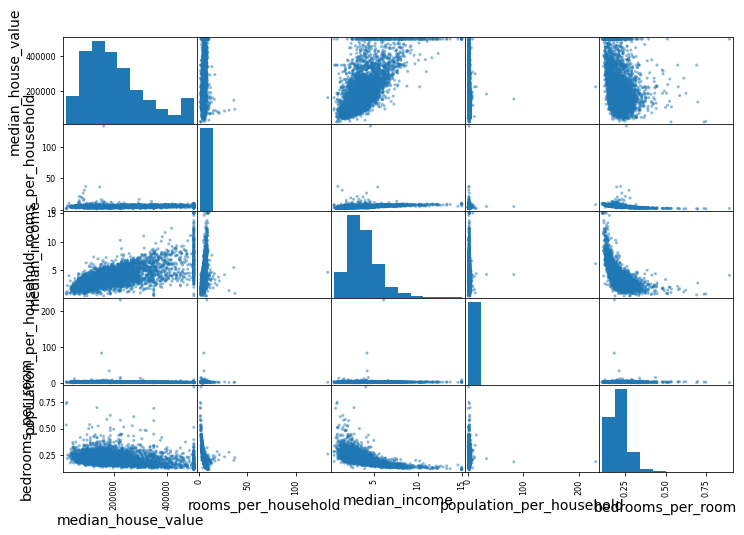

In [145]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","rooms_per_household", "median_income", "population_per_household","bedrooms_per_room"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

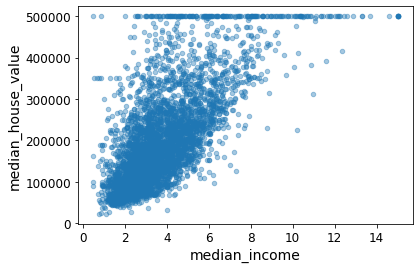

In [146]:
housing_train.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.4)

#### Note horizontal lines at 500k, 450k, 350k (we may need to remove these data) to prevent our algo from reproducing this quirk

In [147]:
housing = train_set_strat.drop("median_house_value",axis=1) # drop() creates a copy of the data and doesn't affect train_set_strat
housing_labels = train_set_strat["median_house_value"].copy()

#### To deal with missing values on individual basis use utils.rectify_missing_vals but in general scikit-learn SimpleImputer can be applied to whole dataset

In [148]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([ 1.02310000e+04, -1.18480000e+02,  3.42400000e+01,  2.80000000e+01,
        2.14350000e+03,  4.36000000e+02,  1.17100000e+03,  4.11000000e+02,
        3.51700000e+00,  5.19870702e+00,  2.04134936e-01,  2.81623532e+00])

In [149]:
X = imputer.transform(housing_num)

In [150]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
14497,14497.0,-117.23,32.87,15.0,2290.0,662.0,1034.0,594.0,3.0104,3.855219,0.289083,1.740741
3438,3438.0,-118.42,34.26,37.0,1789.0,424.0,2279.0,411.0,3.9000,4.352798,0.237004,5.545012
8634,8634.0,-118.41,33.88,34.0,540.0,107.0,213.0,104.0,6.3403,5.192308,0.198148,2.048077
18331,18331.0,-122.15,37.45,52.0,568.0,91.0,219.0,75.0,6.1575,7.573333,0.160211,2.920000
3887,3887.0,-118.53,34.21,18.0,3124.0,796.0,1855.0,725.0,2.9389,4.308966,0.254802,2.558621
...,...,...,...,...,...,...,...,...,...,...,...,...
1846,1846.0,-122.28,37.90,52.0,1369.0,249.0,490.0,248.0,4.1212,5.520161,0.181885,1.975806
483,483.0,-122.27,37.86,52.0,1769.0,372.0,849.0,365.0,2.6914,4.846575,0.210288,2.326027
19663,19663.0,-120.84,37.49,25.0,2383.0,576.0,1234.0,583.0,1.4529,4.087479,0.241712,2.116638
5452,5452.0,-118.46,34.00,39.0,4098.0,1100.0,2054.0,1053.0,2.9180,3.891738,0.268424,1.950617


In [151]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
14497,NEAR OCEAN
3438,<1H OCEAN
8634,<1H OCEAN
18331,NEAR BAY
3887,<1H OCEAN
...,...
1846,NEAR BAY
483,NEAR BAY
19663,INLAND
5452,<1H OCEAN


#### we have to convert ocean_proximity from categorical variable to numerical variable

In [152]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [3.]])

In [153]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

#### in the above encoding two nearby values are not necessarily more similar that two distant values but ML algorithms will assume otherwise therefore it is better to apply one hot encoding

In [154]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<4128x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>